### Введение в нейронные сети
### Итоговая работа

Обучите нейронную сеть любой архитектуры.

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

shape = 28
def preprocess_images(imgs, shape=28):
    sample_img = imgs if len(imgs.shape) == 2 else imgs[0]
    assert sample_img.shape in [(shape, shape, 1), (shape, shape)], sample_img.shape # 28x28 и только 1 канал
    return imgs / 255.0

### Подготовим данные

In [36]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

train_images = train_images.reshape(train_images.shape[0], shape, shape, 1)
test_images = test_images.reshape(test_images.shape[0], shape, shape, 1)

train_images = preprocess_images(train_images, shape=shape)
test_images = preprocess_images(test_images, shape=shape)

### Создаём слои модели

In [38]:
model = keras.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(shape, shape, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Тренируем модель

In [39]:
model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_images, test_labels)

print(f'Точность: {test_acc}')

Epoch 1/10
1875/1875 [==============================] - 119s 62ms/step - loss: 0.1906 - accuracy: 0.9420
Epoch 2/10
1875/1875 [==============================] - 116s 62ms/step - loss: 0.0814 - accuracy: 0.9746
Epoch 3/10
1875/1875 [==============================] - 135s 72ms/step - loss: 0.0597 - accuracy: 0.9817
Epoch 4/10
1875/1875 [==============================] - 130s 69ms/step - loss: 0.0494 - accuracy: 0.9846
Epoch 5/10
1875/1875 [==============================] - 129s 69ms/step - loss: 0.0434 - accuracy: 0.9864
Epoch 6/10
1875/1875 [==============================] - 129s 69ms/step - loss: 0.0361 - accuracy: 0.9880
Epoch 7/10
1875/1875 [==============================] - 128s 68ms/step - loss: 0.0333 - accuracy: 0.9894
Epoch 8/10
1875/1875 [==============================] - 130s 69ms/step - loss: 0.0284 - accuracy: 0.9911
Epoch 9/10
1875/1875 [==============================] - 129s 69ms/step - loss: 0.0277 - accuracy: 0.9913
Epoch 10/10
313/313 [==============================] - 

### Делаем предсказания

313/313 [==============================] - 4s 13ms/step


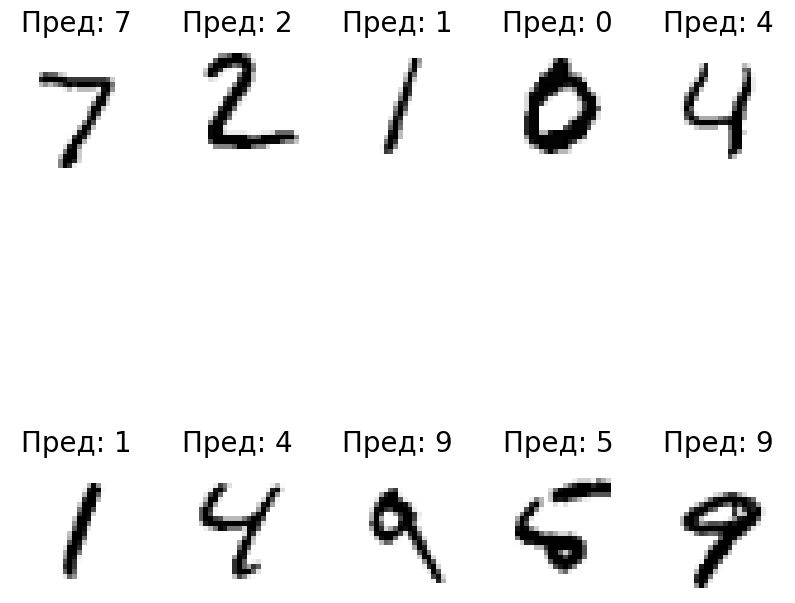

In [44]:
preds = model.predict(test_images)

plt.figure(figsize=[10, 10])

for i in range(1, 11):
    n = i-1
    plt.subplot(2, 5, i)
    plt.imshow(test_images[n].reshape(28, 28), cmap=plt.cm.binary)
    plt.title("Пред: " + str(np.argmax(preds[n], axis=0)), size=20)
    plt.axis('off')

plt.show()